<a href="https://colab.research.google.com/github/lmachlab/CIFAR10_classifier/blob/master/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load PyTorch

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F 
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset


In [6]:


valid_ratio = 0.10

#load train data and create a train and valid dataset
train_data = torchvision.datasets.CIFAR10(root="data", train=True, download=True, transform=transforms.ToTensor())
n_train_examples = int((1-valid_ratio) * len(train_data))
n_valid_examples = int(valid_ratio * len(train_data))
train_set, valid_set = torch.utils.data.random_split(train_data, [n_train_examples, n_valid_examples])


#load test set
test_set = torchvision.datasets.CIFAR10(root="data", train=False, download=True, transform=transforms.ToTensor())


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Files already downloaded and verified
Files already downloaded and verified


# Model structure


In [7]:
class NNetwork1(nn.Module):
    def __init__(self):
        super().__init__()
        # 1 convolutional layer
        self.conv1 = nn.Conv2d(3, 6, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(6*16*16, 10)
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = torch.flatten(x, 1) 
        x = self.fc1(x)
        return x

class NNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        # 2 convolutional layers
        self.conv1 = nn.Conv2d(3, 6, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv2 = nn.Conv2d(6, 12, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(12*8*8, 10)
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = self.fc1(x)
        return x

class NNetwork3(nn.Module):
    def __init__(self):
        super().__init__()
        # 3 convolutional layers
        self.conv1 = nn.Conv2d(3, 6, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv2 = nn.Conv2d(6, 12, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv3 = nn.Conv2d(12, 24, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(24*4*4, 10)
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) 
        x = self.fc1(x)
        return x

class NNetwork4(nn.Module):
    def __init__(self):
        super().__init__()
        # 4 convolutional layers
        self.conv1 = nn.Conv2d(3, 6, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv2 = nn.Conv2d(6, 12, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv3 = nn.Conv2d(12, 24, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv4 = nn.Conv2d(24, 48, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(48*2*2, 10)
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1) 
        x = self.fc1(x)
        return x

class NNetwork5(nn.Module):
    def __init__(self):
        super().__init__()
        # 5 convolutional layers
        self.conv1 = nn.Conv2d(3, 6, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv2 = nn.Conv2d(6, 12, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv3 = nn.Conv2d(12, 24, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv4 = nn.Conv2d(24, 48, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv5 = nn.Conv2d(48, 96, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(96*1*1, 10)
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = torch.flatten(x, 1) 
        x = self.fc1(x)
        return x

# Run model

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np



def run_model(model,running_mode='train', train_set=None, valid_set=None, test_set=None,
    batch_size=1, learning_rate=0.01, n_epochs=1, stop_thr=1e-4, shuffle=True):
   

    if running_mode == 'train':
      
      trainsets = DataLoader(train_set, batch_size=batch_size, shuffle=shuffle)
      if valid_set != None:
        validsets = DataLoader(valid_set, batch_size=batch_size, shuffle=shuffle)
      optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

      loss_dict = {'train':[], 'valid':[]}
      acc_dict = {'train':[], 'valid':[]}
      epoch_index = 0
      for epoch in range(n_epochs):
        model, train_loss, train_accuracy = _train(model=model, data_loader=trainsets, optimizer=optimizer)
        loss_dict['train'].append(train_loss)
        acc_dict['train'].append(train_accuracy)
        if valid_set != None:
          valid_loss, valid_accuracy = _test(model=model, data_loader=validsets)
          loss_dict['valid'].append(valid_loss)
          acc_dict['valid'].append(valid_accuracy)
          if epoch_index > 1:
            loss_diff = loss_dict['valid'][-1] - loss_dict['valid'][-2]
            if abs(loss_diff) < stop_thr:
              return model, loss_dict, acc_dict
        epoch_index += 1
      return model, loss_dict, acc_dict
    else:
      testsets = DataLoader(test_set, batch_size=batch_size, shuffle=shuffle)
      test_loss, test_accuracy = _test(model=model, data_loader=testsets)
      return test_loss, test_accuracy



def _train(model,data_loader,optimizer,device=torch.device('cpu')):

  
    loss = nn.CrossEntropyLoss()
    total_data = 0
    total_loss = 0
    total_examples = 0
    correct_assign = 0
    for data in data_loader:
      X, y = data
      optimizer.zero_grad()
      output = model(X.float())
      y = y.type(torch.LongTensor)
      loss_value = loss(output, y)
      loss_value.backward()
      optimizer.step()
      total_data += 1
      total_loss += loss_value.item()
      total_examples += len(y)
      predictions = torch.argmax(output, dim=1)
      correct_assign += torch.sum(predictions == y)

    train_accuracy = correct_assign / total_examples
    train_accuracy *= 100
    train_loss = total_loss / total_data
    return model, train_loss, train_accuracy


def _test(model, data_loader, device=torch.device('cpu')):
    
    loss = nn.CrossEntropyLoss()
    total_data = 0
    total_loss = 0
    total_examples = 0
    correct_assign = 0

    for data in data_loader:
      X, y = data
      output = model(X.float())
      y = y.type(torch.LongTensor)
      loss_value = loss(output, y)
      total_data += 1
      total_loss += loss_value.item()
      total_examples += len(data[0])
      predictions = torch.argmax(output, dim=1)
      correct_assign += torch.sum(predictions == y)
    
    test_accuracy = correct_assign / total_examples
    test_accuracy *= 100
    test_loss = total_loss / total_data
    return test_loss, test_accuracy



## Train

#### Train the five neural networks with varying in number of convolutional layers (1, 2, 3, 4, 5) for 15 epochs each

In [13]:
model1 = NNetwork1()
model2 = NNetwork2()
model3 = NNetwork3()
model4 = NNetwork4()
model5 = NNetwork5()

trained_model_1, loss_dict_1, acc_dict_1 = run_model(model1, running_mode='train', train_set=train_set, valid_set=valid_set, batch_size=10, n_epochs=15, shuffle=True)
trained_model_2, loss_dict_2, acc_dict_2 = run_model(model2, running_mode='train', train_set=train_set, valid_set=valid_set, batch_size=10, n_epochs=15, shuffle=True)
trained_model_3, loss_dict_3, acc_dict_3 = run_model(model3, running_mode='train', train_set=train_set, valid_set=valid_set, batch_size=10, n_epochs=15, shuffle=True)
trained_model_4, loss_dict_4, acc_dict_4 = run_model(model4, running_mode='train', train_set=train_set, valid_set=valid_set, batch_size=10, n_epochs=15, shuffle=True)
trained_model_5, loss_dict_5, acc_dict_5 = run_model(model5, running_mode='train', train_set=train_set, valid_set=valid_set, batch_size=10, n_epochs=15, shuffle=True)





#### Plot validation loss, testing loss, validation accuracy, and testing accuracy

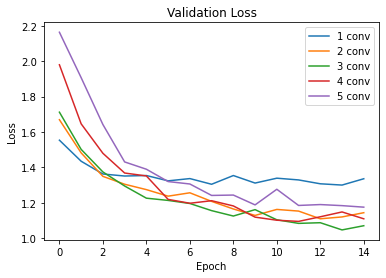

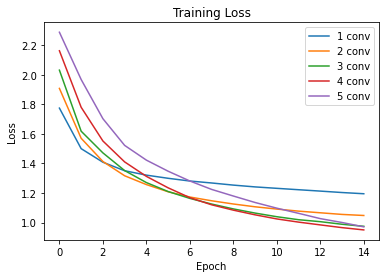

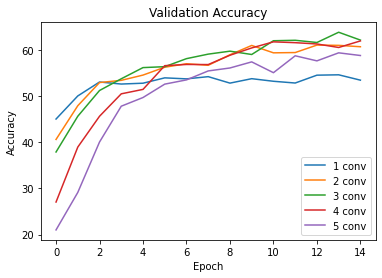

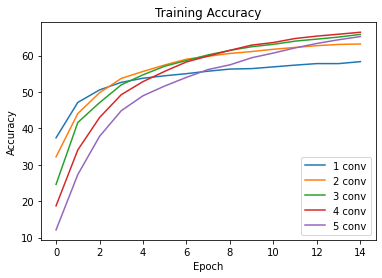

In [14]:
epoch_list = list(range(0, 15))



valid_loss1 = loss_dict_1['valid']
train_loss1 = loss_dict_1['train']
valid_acc1 = acc_dict_1['valid']
train_acc1 = acc_dict_1['train']
epoch_list1 = list(range(0, len(valid_loss1)))


valid_loss2 = loss_dict_2['valid']
train_loss2 = loss_dict_2['train']
valid_acc2 = acc_dict_2['valid']
train_acc2 = acc_dict_2['train']
epoch_list2 = list(range(0, len(valid_loss2)))


valid_loss3 = loss_dict_3['valid']
train_loss3 = loss_dict_3['train']
valid_acc3 = acc_dict_3['valid']
train_acc3 = acc_dict_3['train']
epoch_list3 = list(range(0, len(valid_loss3)))

valid_loss4 = loss_dict_4['valid']
train_loss4 = loss_dict_4['train']
valid_acc4 = acc_dict_4['valid']
train_acc4 = acc_dict_4['train']
epoch_list4 = list(range(0, len(valid_loss4)))

valid_loss5 = loss_dict_5['valid']
train_loss5 = loss_dict_5['train']
valid_acc5 = acc_dict_5['valid']
train_acc5 = acc_dict_5['train']
epoch_list5 = list(range(0, len(valid_loss5)))


plt.plot(epoch_list1,valid_loss1, label = '1 conv')
plt.plot(epoch_list2,valid_loss2, label = '2 conv')
plt.plot(epoch_list3,valid_loss3, label = '3 conv')
plt.plot(epoch_list4,valid_loss4, label = '4 conv')
plt.plot(epoch_list5,valid_loss5, label = '5 conv')
plt.title("Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epoch_list1,train_loss1, label = '1 conv')
plt.plot(epoch_list2,train_loss2, label = '2 conv')
plt.plot(epoch_list3,train_loss3, label = '3 conv')
plt.plot(epoch_list4,train_loss4, label = '4 conv')
plt.plot(epoch_list5,train_loss5, label = '5 conv')
plt.title("Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epoch_list1,valid_acc1, label = '1 conv')
plt.plot(epoch_list2,valid_acc2, label = '2 conv')
plt.plot(epoch_list3,valid_acc3, label = '3 conv')
plt.plot(epoch_list4,valid_acc4, label = '4 conv')
plt.plot(epoch_list5,valid_acc5, label = '5 conv')
plt.title("Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epoch_list1,train_acc1, label = '1 conv')
plt.plot(epoch_list2,train_acc2, label = '2 conv')
plt.plot(epoch_list3,train_acc3, label = '3 conv')
plt.plot(epoch_list4,train_acc4, label = '4 conv')
plt.plot(epoch_list5,train_acc5, label = '5 conv')
plt.title("Training Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### The network with three convolutional layers has the highest validation accuracy and the lowest validation loss. Though I had expected the network with five convolutional layers to perform the best (because of greater complexity), this was not the case. It is possible this is because the way I structured the CNNs, a greater number of convolutional layers at a certain point leads to too small of a convolved feature map.

## Test

#### Test each model trained, and record the accuracy of each

In [15]:
test_loss_1, test_accuracy_1 = run_model(trained_model_1, running_mode='test', test_set=test_set, batch_size=10, shuffle=False)
print("percentage of accurately labeled images with one convolutional layer: ", float(test_accuracy_1))

test_loss_2, test_accuracy_2 = run_model(trained_model_2, running_mode='test', test_set=test_set, batch_size=10, shuffle=False)
print("percentage of accurately labeled images with two convolutional layers: ", float(test_accuracy_2))

test_loss_3, test_accuracy_3 = run_model(trained_model_3, running_mode='test', test_set=test_set, batch_size=10, shuffle=False)
print("percentage of accurately labeled images with three convolutional layers: ", float(test_accuracy_3))

test_loss_4, test_accuracy_4 = run_model(trained_model_4, running_mode='test', test_set=test_set, batch_size=10, shuffle=False)
print("percentage of accurately labeled images with four convolutional layers: ", float(test_accuracy_4))

test_loss_5, test_accuracy_5 = run_model(trained_model_5, running_mode='test', test_set=test_set, batch_size=10, shuffle=False)
print("percentage of accurately labeled images with five convolutional layers: ", float(test_accuracy_5))

percentage of accurately labeled images with one convolutional layer:  53.71000289916992
percentage of accurately labeled images with two convolutional layers:  60.1400032043457
percentage of accurately labeled images with three convolutional layers:  62.959999084472656
percentage of accurately labeled images with four convolutional layers:  61.69000244140625
percentage of accurately labeled images with five convolutional layers:  59.10000228881836


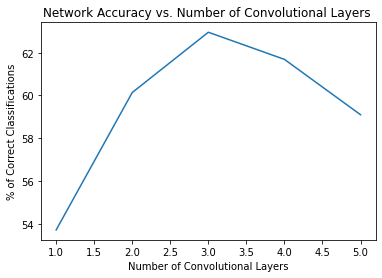

In [16]:
x_axis = [1, 2, 3, 4, 5]
y_axis = [float(test_accuracy_1), float(test_accuracy_2), float(test_accuracy_3), float(test_accuracy_4), float(test_accuracy_5)]
plt.plot(x_axis,y_axis)
plt.title("Network Accuracy vs. Number of Convolutional Layers ")
plt.xlabel('Number of Convolutional Layers')
plt.ylabel('% of Correct Classifications')
plt.show()

## Train

#### train the neural network that has 3 hidden layers on 100 epochs

In [17]:
model_3 = NNetwork3()

trained_model_100, loss_dict_100, acc_dict_100 = run_model(model_3, running_mode='train', train_set=train_set, valid_set=valid_set, batch_size=10, n_epochs=100, shuffle=True)



#### plot validation loss, training loss, validation accuracy, and test accuracy across each epoch

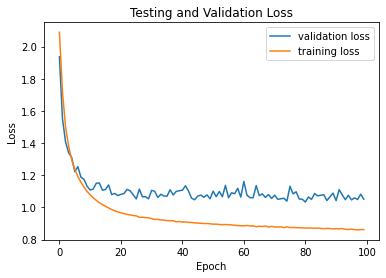

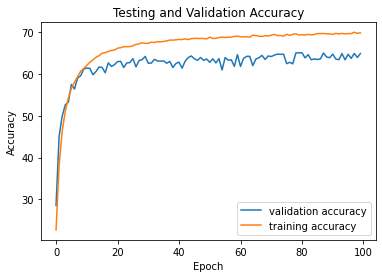

In [18]:

valid_acc100 = acc_dict_100['valid']
train_acc100 = acc_dict_100['train']
valid_loss100 = loss_dict_100['valid']
train_loss100 = loss_dict_100['train']
epoch_list = list(range(0, len(valid_acc100)))

plt.plot(epoch_list,valid_loss100, label = 'validation loss')
plt.plot(epoch_list,train_loss100, label = 'training loss')
plt.title("Testing and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epoch_list,valid_acc100, label = 'validation accuracy')
plt.plot(epoch_list,train_acc100, label = 'training accuracy')
plt.title("Testing and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Test

In [19]:


test_loss, test_accuracy = run_model(trained_model_100, running_mode='test', test_set=test_set, batch_size=10, shuffle=False)
  


print('test accuracy: ', test_accuracy)


test accuracy:  tensor(63.8200)
